In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import bz2
import pickle

In [4]:
# Step 1: Load the dataset
df = pd.read_csv(r"C:\Users\user\Documents\ola.csv")

In [5]:
# Step 2: Parse datetime column and set it as the index
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

In [6]:
# Step 3: Feature engineering - extract more features from datetime
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['year'] = df.index.year

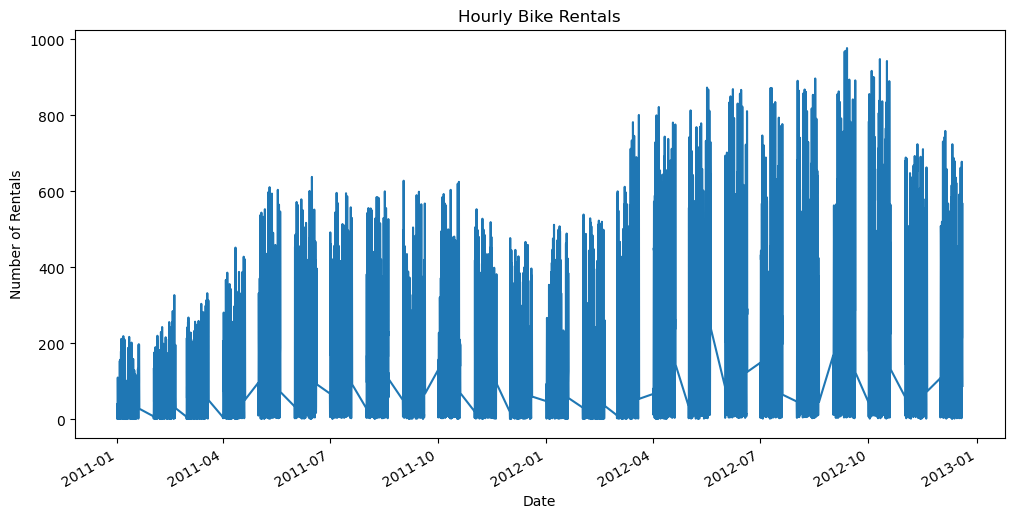

In [7]:
# Step 4: Plotting to understand the distribution of bike rentals over time
plt.figure(figsize=(12,6))
df['count'].plot()
plt.title('Hourly Bike Rentals')
plt.xlabel('Date')
plt.ylabel('Number of Rentals')
plt.show()

In [8]:
# Step 5: Define independent variables and target variable
X = df[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'hour', 'day_of_week', 'month']]
y = df['count']

In [9]:
# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Step 7: Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Step 8: Make predictions
y_pred = model.predict(X_test)

In [12]:
# Step 9: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 21658.242880327274


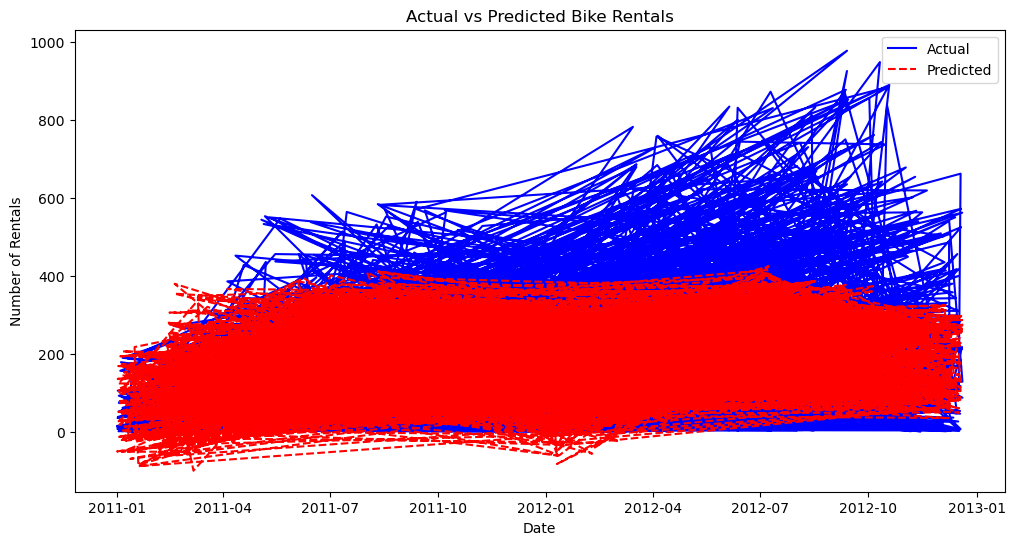

In [13]:
# Optional: Plot the predicted vs actual rentals
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Bike Rentals')
plt.xlabel('Date')
plt.ylabel('Number of Rentals')
plt.legend()
plt.show()

In [27]:
# save the credit classification model as a pickle file


def compressed_pickle(bikeriderequest, model):
    with bz2.BZ2File(f"{bikeriderequest}.pbz2", 'w') as f:
        pickle.dump(model, f)

In [ ]:
# Save your model as a compressed pickle file
compressed_pickle("bikeriderequest", model)